A notebook to process experimental results of ex1_vary_n.py: Rejection rate as sample size $n$ increases.

In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

import numpy as np
import scipy.stats as stats

import torch
import torch.distributions as dists

import kcgof
import kcgof.log as klog
import kcgof.util as util
import kcgof.cdensity as cden
import kcgof.cdata as cdat
import kcgof.cgoftest as cgof
import kcgof.kernel as ker
import kcgof.plot as plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import matplotlib
import matplotlib.pyplot as plt

# font options
font = {
    #'family' : 'normal',
    #'weight' : 'bold',
    'size'   : 20
}

plt.rc('font', **font)
plt.rc('lines', linewidth=2)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

---------------

In [29]:
def load_plot_vs_ns(fname, show_legend=True, xscale='linear', yscale='linear'):
    """
    ns = sample sizes
    """
    func_xvalues = lambda agg_results: agg_results['ns']
    ex = 1
    def func_title(agg_results):
        repeats, _, n_methods = agg_results['job_results'].shape
        alpha = agg_results['alpha']
        title = '%s. %d trials. $\\alpha$ = %.2g.'%\
            ( agg_results['prob_label'], repeats, alpha)
        return title
    #plt.figure(figsize=(10,5))
    results = plot.plot_prob_reject(
        ex, fname, func_xvalues, '', func_title=func_title)
    
    plt.title('')
    
    if xscale is not None:
        plt.xscale(xscale)
    if yscale is not None:
        plt.yscale(yscale)
    
    plt.xlabel('Sample size $n$')
    plt.gca().legend(loc='best').set_visible(show_legend)
    if show_legend:
        plt.legend(bbox_to_anchor=(1.0, 1.05))
        
    plt.grid(False)
    return results

In [30]:
# def load_runtime_vs_ns(fname, xlabel='Sample size $n$', 
#                       show_legend=True, xscale='linear', yscale='linear'):
#     func_xvalues = lambda agg_results: agg_results['ns']
#     ex = 1
#     def func_title(agg_results):
#         repeats, _, n_methods = agg_results['job_results'].shape
#         alpha = agg_results['alpha']
#         title = '%s. %d trials. $\\alpha$ = %.2g.'%\
#             ( agg_results['prob_label'], repeats, alpha)
#         return title
#     #plt.figure(figsize=(10,6))
    
#     results = plot.plot_runtime(ex, fname,  
#                                 func_xvalues, xlabel=xlabel, func_title=func_title)
    
#     plt.title('')
#     plt.gca().legend(loc='best').set_visible(show_legend)
#     if show_legend:
#         plt.legend(bbox_to_anchor=(1.0, 1.05))
    
#     #plt.grid(True)
#     if xscale is not None:
#         plt.xscale(xscale)
#     if yscale is not None:
#         plt.yscale(yscale)
#     return results

----------

## 5D Gaussian problem. H0 is true

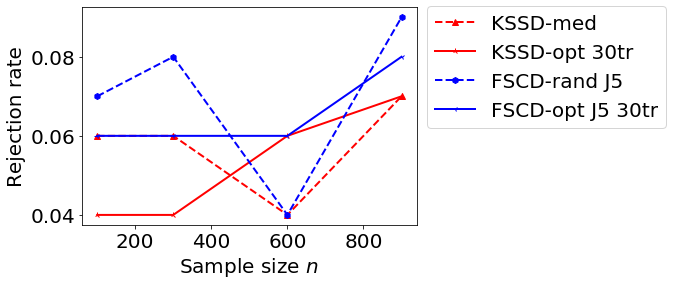

In [31]:
gauss5d_h0_fname = 'ex1-gaussls_h0_d5-me4_rs100_nmi100_nma900_a0.050.p'
gauss5d_h0_results = load_plot_vs_ns(gauss5d_h0_fname, show_legend=True)
# plt.grid()
# plt.yticks([0, 0.025, 0.05, 0.075, 0.1])
# plt.savefig(gauss5d_h0_fname.replace('.p', '.pdf', 1), bbox_inches='tight')

## Quad quad d1

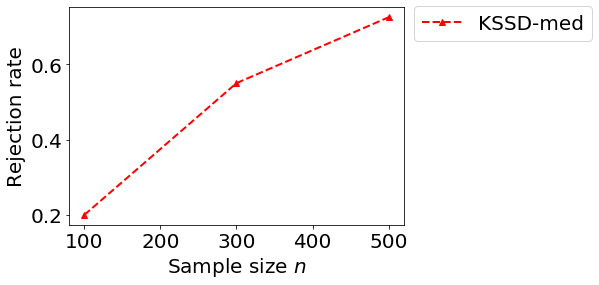

In [32]:
qq_d1_fname = 'ex1-quad_quad_d1-me1_rs40_nmi100_nma500_a0.050.p'
qq_d1_results = load_plot_vs_ns(qq_d1_fname, show_legend=True)

## Gauss vs T (d=1)

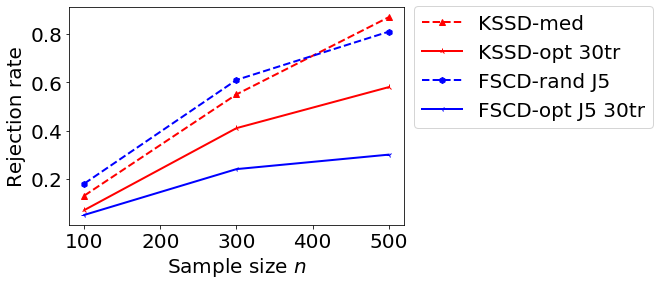

In [33]:
gausst_d1_fname = 'ex1-gauss_t_d1-me4_rs100_nmi100_nma500_a0.050.p'
gausst_d1_results = load_plot_vs_ns(gausst_d1_fname, show_legend=True)

## quad_vs_lin_d1


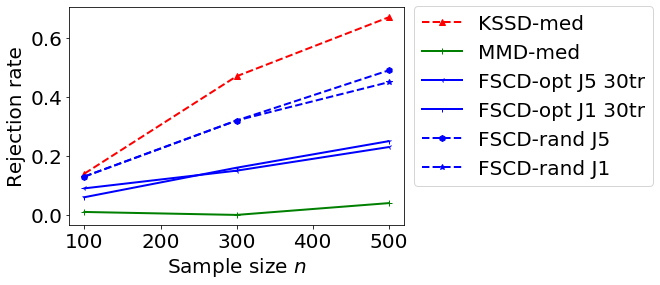

In [34]:
quad_vs_lin_d1_fname = 'ex1-quad_vs_lin_d1-me6_rs100_nmi100_nma500_a0.050.p'
quad_vs_lin_d1_results = load_plot_vs_ns(quad_vs_lin_d1_fname, show_legend=True)

------------

## g_het_dx3

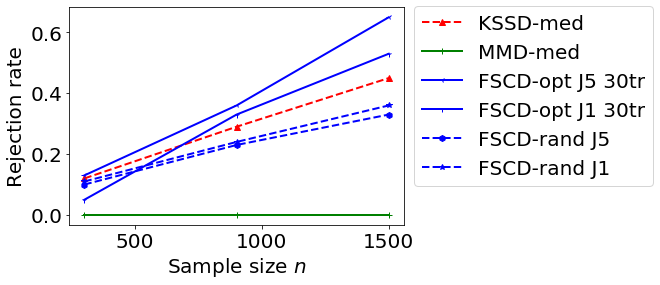

In [35]:
g_het_dx3_fname = 'ex1-g_het_dx3-me6_rs100_nmi300_nma1500_a0.050.p'
g_het_dx3_results = load_plot_vs_ns(g_het_dx3_fname, show_legend=True)

# g_het_dx5

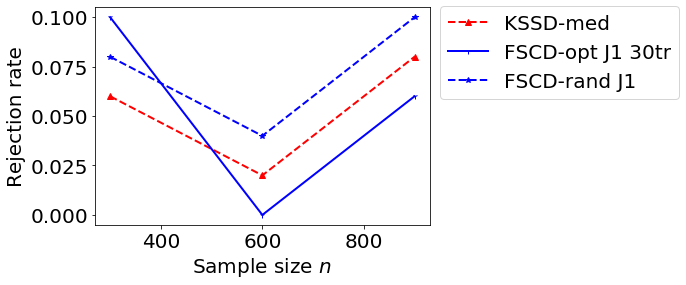

In [36]:
g_het_dx5_fname = 'ex1-g_het_dx5-me3_rs50_nmi300_nma900_a0.050.p'
g_het_dx5_results = load_plot_vs_ns(g_het_dx5_fname, show_legend=True)

## g_het_dx10


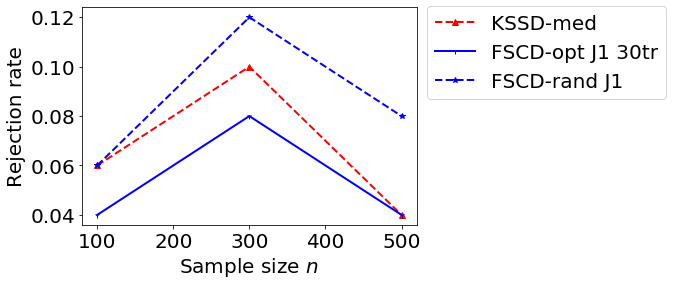

In [37]:
g_het_dx10_fname = 'ex1-g_het_dx10-me3_rs50_nmi100_nma500_a0.050.p'
g_het_dx10_results = load_plot_vs_ns(g_het_dx10_fname, show_legend=True)